In [8]:
!pip install tensorflow==2.12.1


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2

In [3]:
from google.colab import files
uploaded = files.upload()


Saving keras_model.h5 to keras_model.h5
Saving labels.txt to labels.txt


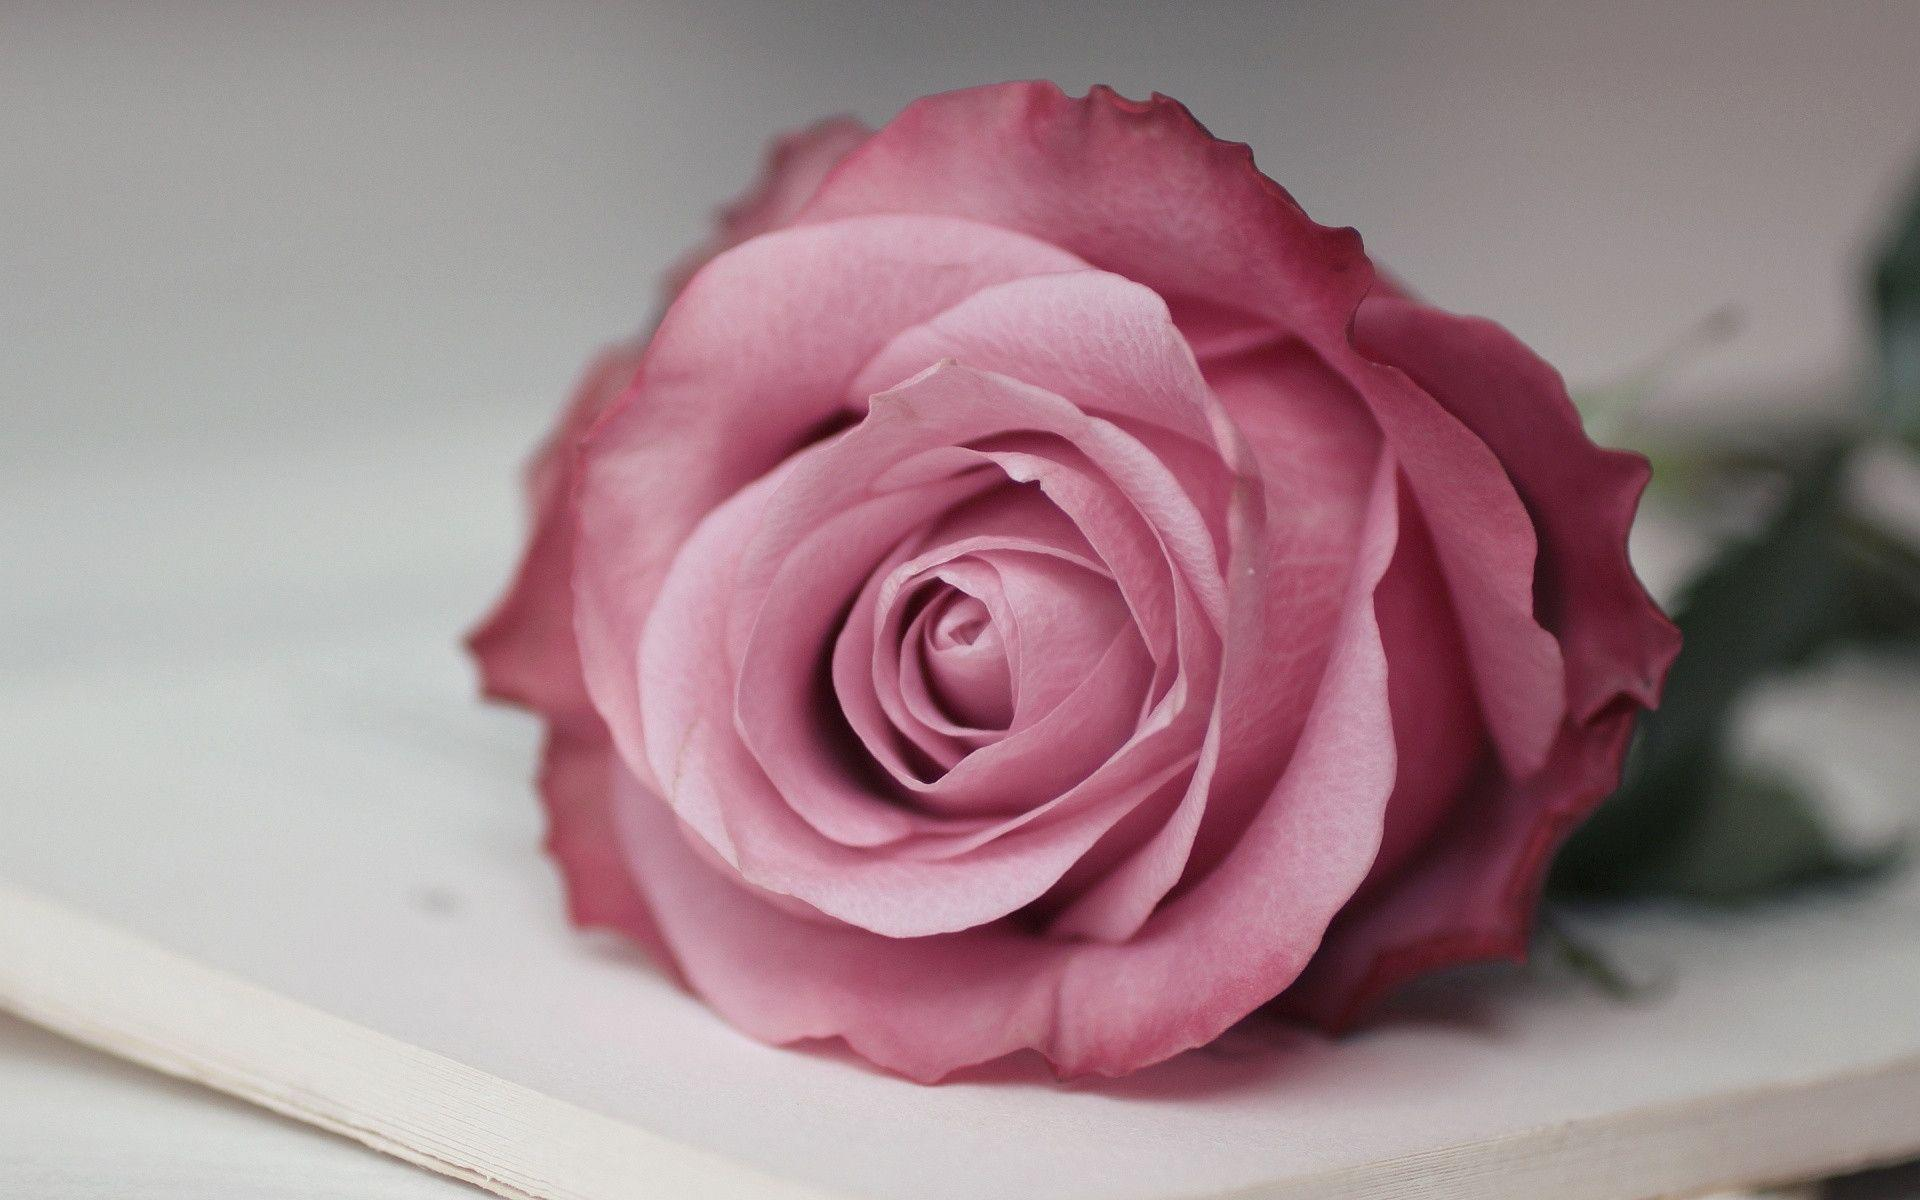

1/1 [==============================] - 2s 2s/step
Class: rose
Confidence Score: 0.9999981


In [9]:
from keras.models import load_model  # Load Keras model
from PIL import Image, ImageOps  # For image processing
import numpy as np
from IPython.display import display  # For displaying the image in notebook

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the trained Keras model
model = load_model("keras_model.h5", compile=False)

# Load class labels
class_names = open("labels.txt", "r").readlines()

# Create an empty NumPy array with the correct shape for model input
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Load and display the input image
image = Image.open("/content/R (3).jfif").convert("RGB")
display(image)  # Show original image

# Resize and crop the image to 224x224 pixels
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# Convert the image to a NumPy array
image_array = np.asarray(image)

# Normalize pixel values to the range [-1, 1]
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the processed image into the array
data[0] = normalized_image_array

# Make prediction using the model
prediction = model.predict(data)
index = np.argmax(prediction)  # Get index of highest probability class
class_name = class_names[index]  # Get class label
confidence_score = prediction[0][index]  # Get confidence score

# Print results
print("Class:", class_name[2:], end="")  # Skip label index (e.g., "0 ") from class name
print("Confidence Score:", confidence_score)
